

# Project: Investigate a Dataset (Noshow Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Noshow Appointments dataset is basically dataset collected carrying information
from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of
characteristics about the patient are PatientId which is unique and indentifies certain patient, AppointmentID which is associated with the appointment of the patient,	Gender of the parient, ScheduledDay, AppointmentDay, age of the patient, and Neighbourhood where the patient lives, SMS_received which is a reminder sent to patients and few other variables we yet to see. This dataset is provided on kaggle.
The dataset is interesting to explore to see the factors that may be affecting patients not to show. Throughout the project, we are exploring the dataset to see the variables that may be affecting the noshow and try answer the following questions.
## Questions

1. How is age affecting the patient's absence? 
2. What is the percentage of the noshow cases?
3. Do SMS reminders decrease the number of absences?
4. Is there a coleration between the neighbourhood and not showing up?
5. Does being handicaped often make you not show up?
6. Are no-show appointments associated with a certain gender?
7. What is the correlation between all variables?



In [2]:
#imports

import pandas as pd 
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_noshow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_noshow.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# A function used to display number of enrties per column, datatype of column, and number of NaN values per column
def infoDisplay():
    df_noshow.info()
    
infoDisplay()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Lets check the distribution of the numerical columns
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

In [6]:
# Remove any rows with value other than yes or no in the No-show column
df_yes_noshow = df_noshow.loc[df_noshow['No-show'] == 'Yes']
df_no_noshow = df_noshow.loc[df_noshow['No-show'] == 'No']
df_noshow = df_yes_noshow.append(df_no_noshow, ignore_index=True)

In [7]:
#check for duplicated rows
df_noshow.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
110497    False
110498    False
110499    False
110500    False
110501    False
110502    False
110503    False
110504    False
110505    False
110506    False
110507    False
110508    False
110509    False
110510    False
110511    False
110512    False
110513    False
110514    False
110515    False
110516    False
110517    False
110518    False
110519    False
110520    False
110521    False
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: b

In [8]:
# Drop duplicates if they occur and recheck the number of entries to see if any rows are dropped
df_noshow.drop_duplicates(inplace=True)
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [9]:
df_noshow[df_noshow['Age'] < 0] = df_noshow['Age'].mean()


In [10]:
df_noshow['ScheduledDay'] = pd.to_datetime(df_noshow['ScheduledDay'])
df_noshow['AppointmentDay'] = pd.to_datetime(df_noshow['AppointmentDay'])

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (How is age affecting the patient's absence? (Age groups classification))

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_noshow_age = df_noshow.loc[df_noshow['No-show'] == 'Yes']

In [12]:
df_noshow_age = df_noshow_age[['Age','No-show']]

In [13]:
df_noshow_age.head()

,Age,No-show
0,23.0,Yes
1,39.0,Yes
2,29.0,Yes
3,40.0,Yes
4,30.0,Yes


In [14]:
df_noshow_age.describe()

,Age
count,22319.000000
mean,34.317667
std,21.965941
min,0.000000
25%,16.000000
50%,33.000000
75%,51.000000
max,115.000000


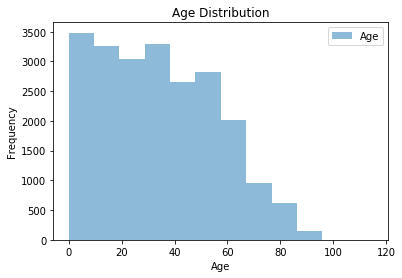

In [52]:
nowshow_age = df_noshow_age.plot.hist(bins=12, alpha=0.5, title="Age Distribution")
plt.xlabel('Age')
plt.show()

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f4ab19dcd30>>

### As age increases, noshow cases decreases. Maxiumum noshow is between 0 and 10 years old.

### Research Question 2  (What is the percentage of the noshow cases?)

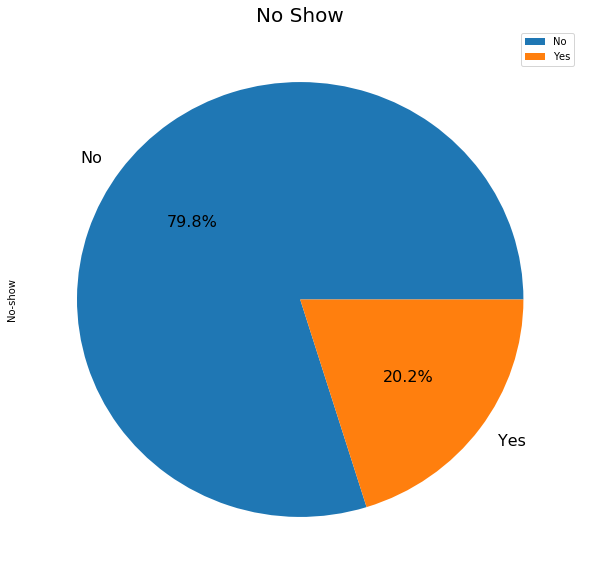

In [82]:
#Lets see the percentage of people not showing up
df_noshowper = df_noshow[['No-show']]

noshowperPie = df_noshowper['No-show'].value_counts()
pieChart = noshowperPie.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 16);
pieChart.set_title("No Show", fontsize = 20);
plt.legend();


#### 20.2% of the appointments are no show which is a big percentage. That's why we are studying the dataset to try conclude the reason behind noshow cases and minimize them as much as possible.

### Research Question 3  (Do SMS reminders decrease the number of absences?)

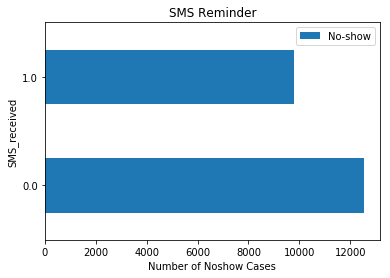

In [51]:
#Lets see if recieving a SMS affects the outcome strongly
df_sms_noshow = df_noshow[['SMS_received','No-show']]
df_sms_noshow = df_sms_noshow.loc[df_sms_noshow['No-show'] == 'Yes']
df_sms_noshow.groupby('SMS_received').count().plot(kind='barh',title="SMS Reminder")
plt.xlabel('Number of Noshow Cases')
plt.show()

### Difference between SMS_received is not huge which shows that sms reminders does not play a huge difference.

### Research Question 4  (Is there a coleration between the neighbourhood and not showing up?)

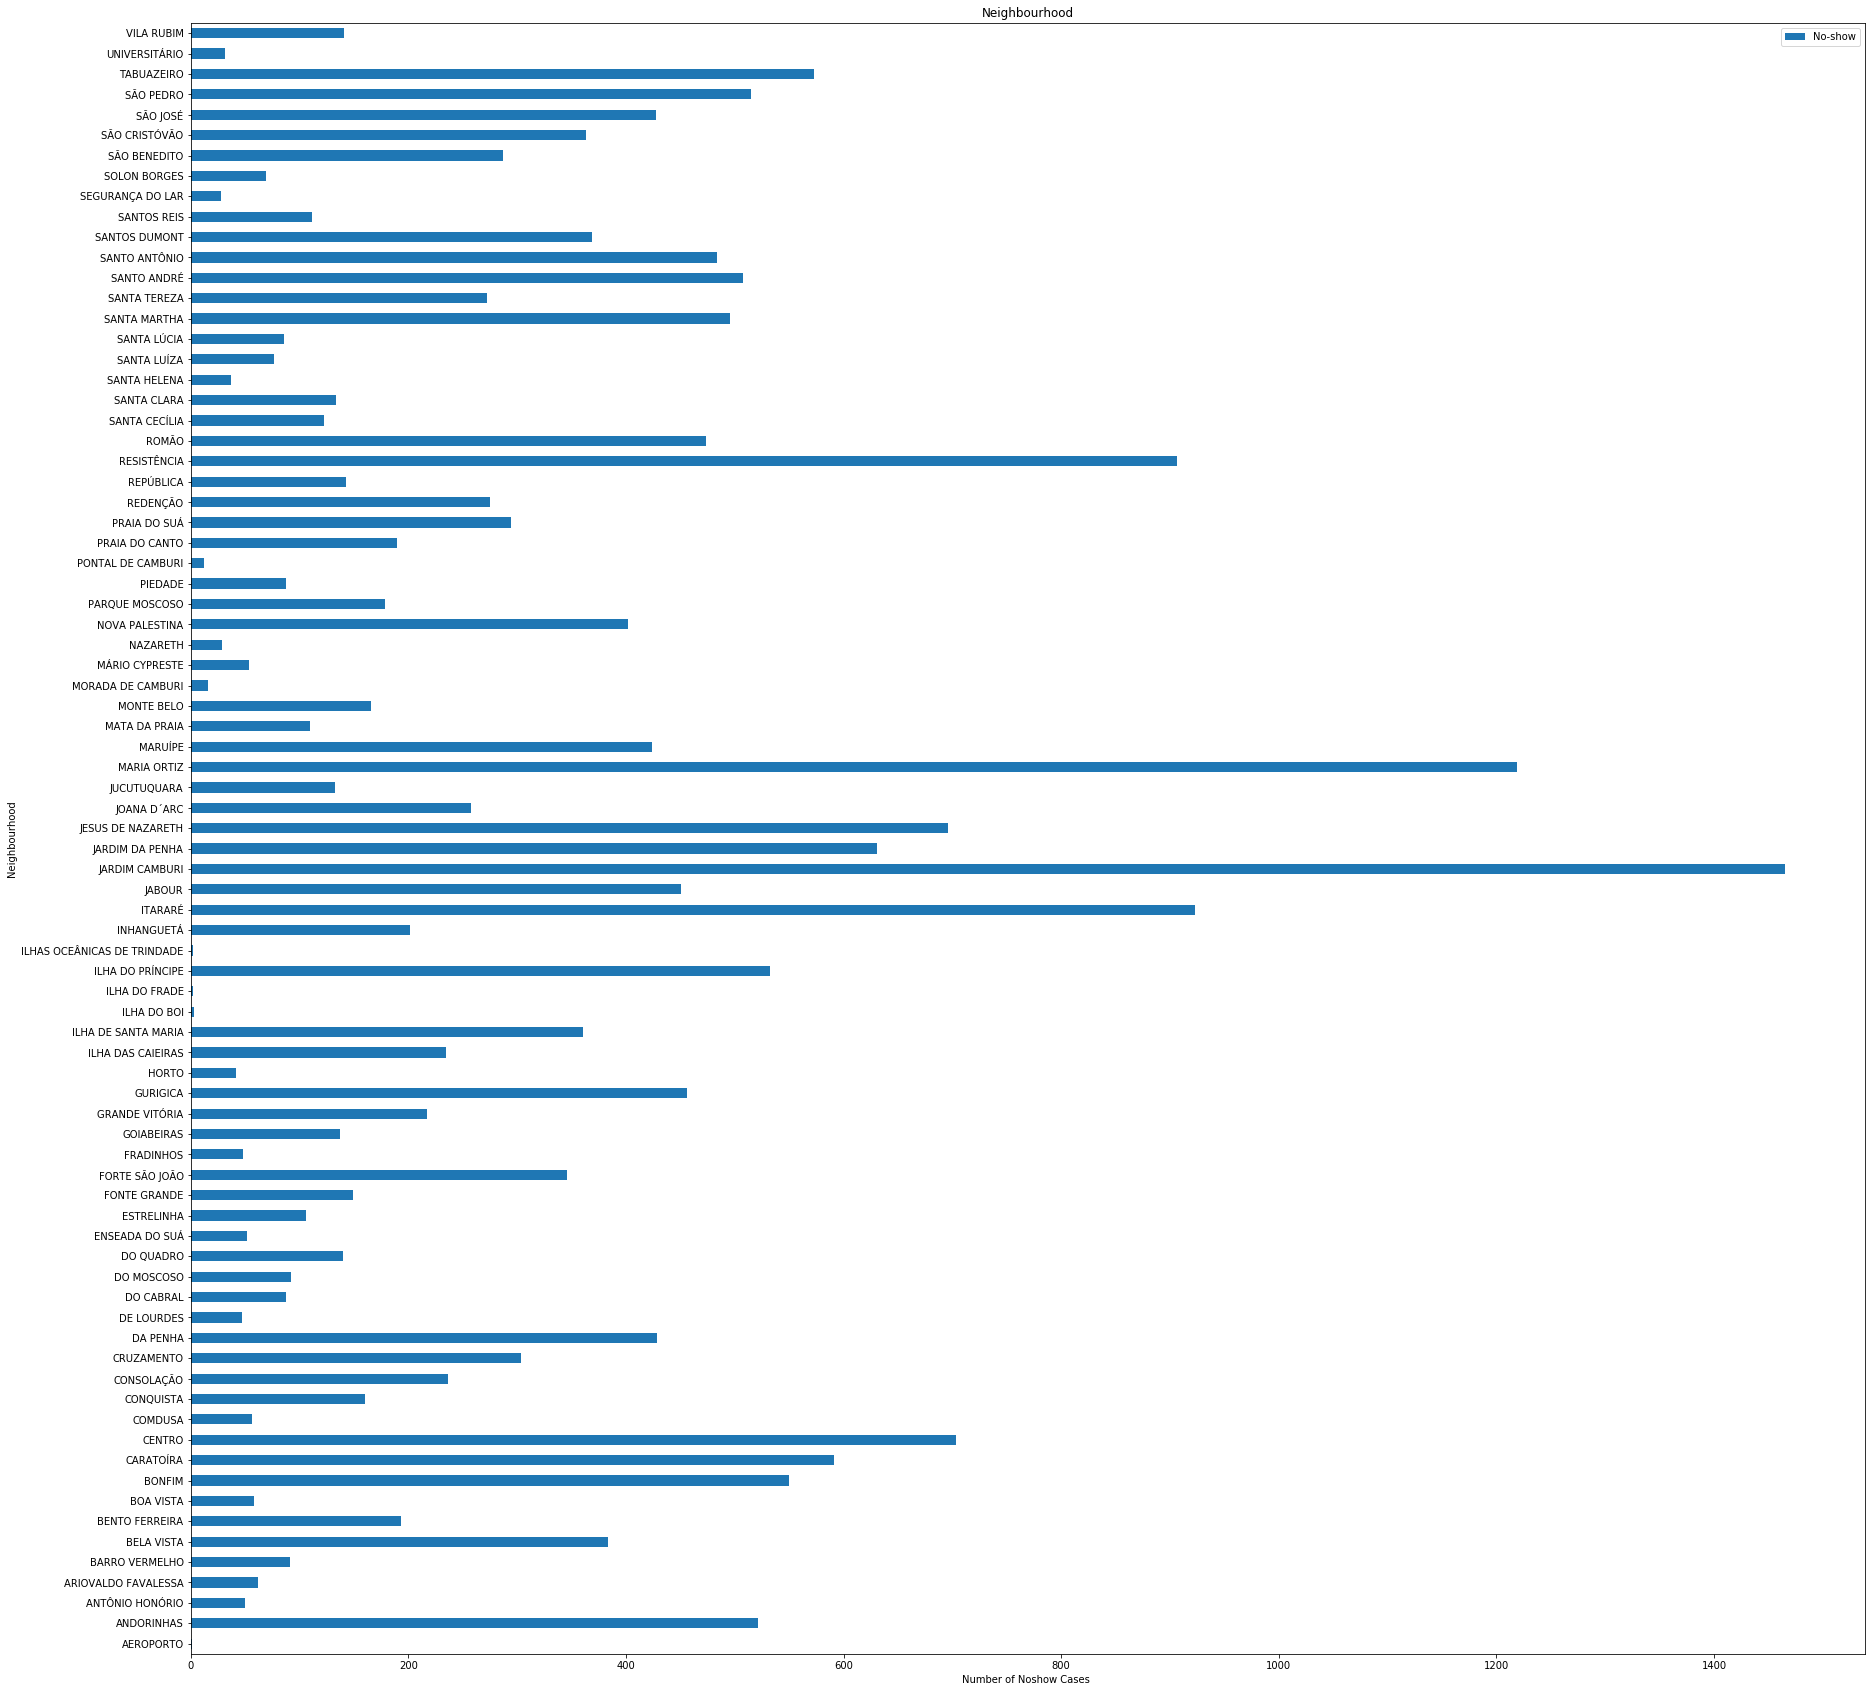

In [47]:
#Lets see what are the neighbourhoods with the highest number of noshow cases, maybe it is because of traffic 
df_neighbourhood_noshow = df_noshow[['Neighbourhood','No-show']]
df_neighbourhood_noshow = df_neighbourhood_noshow.loc[df_neighbourhood_noshow['No-show'] == 'Yes']
df_neighbourhood_noshow.groupby('Neighbourhood').count().plot(kind='barh',figsize=(30,30),title="Neighbourhood")
plt.xlabel('Number of Noshow Cases ')
plt.show()

### Some neighbourhoods have very high no show cases. Might be because of traffic or that they are very far from the hospital. More data need to be analyzed.

### Research Question 5  (Does being handicaped often make you not show up?)

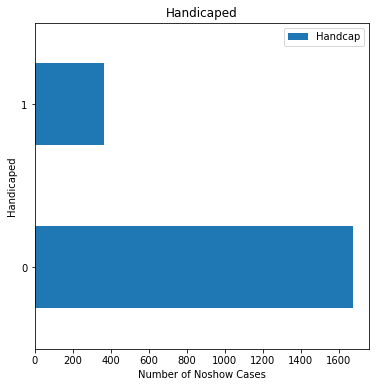

In [49]:
#Lets see if being handicaped affects the outcome for example if they dont fine assistance to the doctor
df_handcap_noshow = df_noshow[['Handcap','No-show']]
df_handcap_noshow = df_handcap_noshow.loc[df_handcap_noshow['Handcap'] == 1.0]
df_handcap_noshow['No-show'] = df_handcap_noshow['No-show'].map(  {'Yes':1 ,'No':0}) 
df_handcap_noshow.groupby('No-show').count().plot(kind='barh',figsize=(6,6),title="Handicaped")
plt.xlabel('Number of Noshow Cases')
plt.ylabel('Handicaped')
plt.show()


### Most of the handicaped don't miss their appointments.

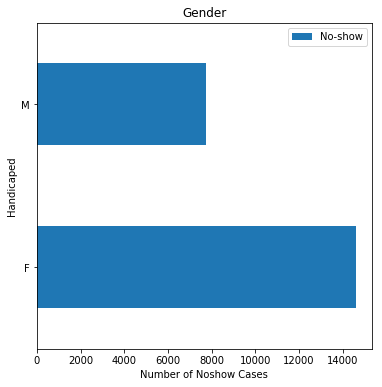

In [50]:

df_gender_noshow = df_noshow[['Gender','No-show']]
df_gender_noshow = df_gender_noshow.loc[df_gender_noshow['No-show'] == 'Yes']
df_gender_noshow.groupby('Gender').count().plot(kind='barh',figsize=(6,6),title="Gender")
plt.xlabel('Number of Noshow Cases')
plt.ylabel('Handicaped')
plt.show()


### Research Question 6  (Are no-show appointments associated with a certain gender?)

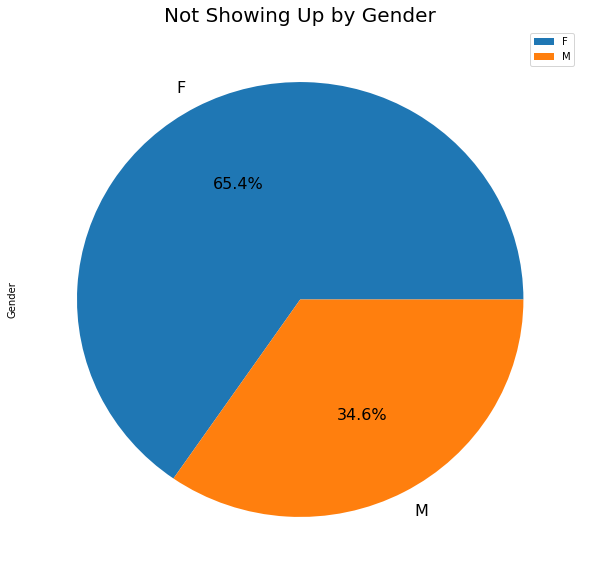

In [181]:
df_gender_noshow = df_noshow[['Gender','No-show']]
df_gender_noshow = df_gender_noshow.loc[df_gender_noshow['No-show'] == 'Yes']

genderPie = df_gender_noshow['Gender'].value_counts()
pieChart = genderPie.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 16);
pieChart.set_title("Not Showing Up by Gender", fontsize = 20);
plt.legend();

### Research Question 7 (What is the correlation between all variables?)

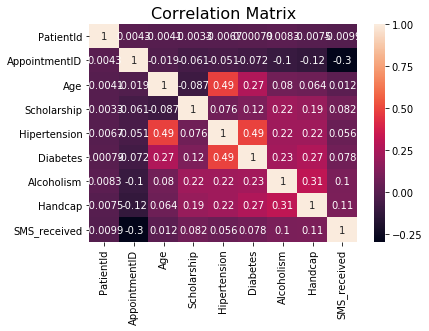

In [41]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df_noshow.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix', fontsize=16);

### Highest correlation is between Hipertension cases and age, Hipertension cases and diabetes cases. This is not significant in our research as it is pure medical counclusions. There is no strong correlation between any other variables to indicate a usefel finding.

<a id='conclusions'></a>
## Conclusions

Results:

1. The mean age of noshow is 35 years old, elderlies usually show up.
2. 65.4% of no show cases are women.
3. Most of the handicaped show up and do not miss their appointments.
4. 20.2 % of the patients does not show.
5. No show of people who did not recieve SMS is more than who recieved.

## Limitations

1. Can't show correaltions as most data is categorical.
2. Vatiables need to be more detailed.



In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0